# Code for review 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from scipy import stats
import xarray as xr
import xcdat as xc
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm as BM
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as mticker
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 12
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 2.0
# Tick properties
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'

In [4]:
pop_2020 = xc.open_dataset('./data/population/gpw_gridded_population_2020.nc', lon_orient=(-180, 180)).Band1

2024-09-06 16:10:31,316 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


In [5]:
pop_density_2020 = xc.open_dataset('./data/pop_density/gpw_gridded_population_density_2020.nc', lon_orient=(-180, 180)).Band1

2024-09-06 16:10:31,349 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


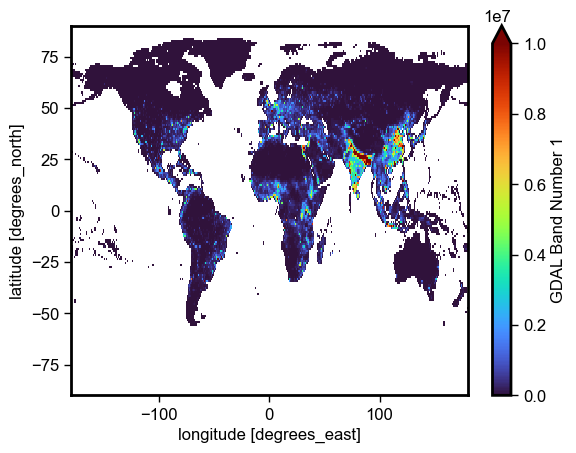

In [6]:
pop_2020.plot(vmax = 10000000, cmap='turbo')

In [7]:
pop_2020['lat'] = pop_density_2020['lat']
pop_2020['lon'] = pop_density_2020['lon']

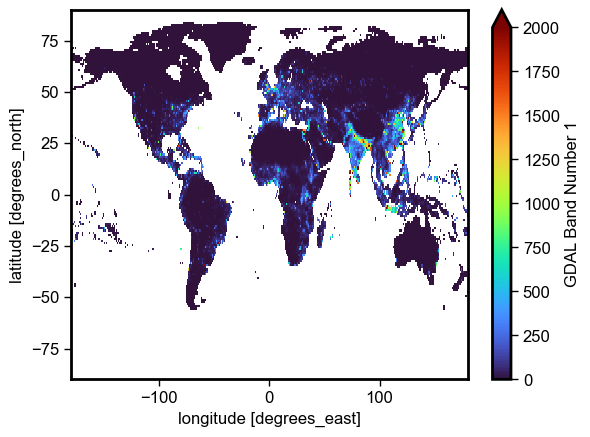

In [8]:
# ax = plt.axes(projection=ccrs.PlateCarree())
pop_density_2020.plot(vmax=2000, cmap='turbo')
# ax.coastlines()

## Visualizing the importance of acceleration analysis

In [9]:
best_loc = './data/tas/Berkeley_Earth_Land_and_Ocean_LatLong1.nc'
best = xr.open_dataset(best_loc)
best

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2084, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               16-Sep-2023 07:12:12
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   04-Sep-2023 07:26:43
    ocean_source_history:  16-Sep-2023 05:22:22
    comment:               This file contains Berkeley Earth surface temperat...

In [10]:
#use population data as mask
pop_2020 = xc.open_dataset('./data/population/gpw_gridded_population_2020.nc', lon_orient=(-180, 180)).Band1
pop_2020

2024-09-06 16:10:31,757 [WARNING]: dataset.py(open_dataset:109) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


<xarray.DataArray 'Band1' (lat: 180, lon: 360)>
[64800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    long_name:           GDAL Band Number 1
    RepresentationType:  ATHEMATIC
    grid_mapping:        crs

In [11]:
best = best.rename(dict(latitude = 'lat', longitude = 'lon'))
best['time'] = pd.date_range(start='1850-01-01', end='2023-08-31', freq='1M')
best['lat'] = pop_2020.lat
best['lon'] = pop_2020.lon
best

<xarray.Dataset>
Dimensions:      (lon: 360, lat: 180, time: 2084, month_number: 12)
Coordinates:
  * lon          (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time         (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2023-08-31
Dimensions without coordinates: month_number
Data variables:
    land_mask    (lat, lon) float64 ...
    temperature  (time, lat, lon) float32 ...
    climatology  (month_number, lat, lon) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               16-Sep-2023 07:12:12
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   04-Sep-2023 07:26:43
    ocean_source_history:  16-Sep-2023 05:22:22
    comment:               This file contains Berkeley Earth surface temperat...

In [12]:
from functions import preprocess_temp
from functions import trend_analysis

In [13]:
best_gmst = preprocess_temp.calc_gmst(best.temperature)
best_gmst_land = preprocess_temp.calc_gmst(best.temperature.where(~pop_2020.isnull()))
best_smooth_gmst = pd.DataFrame(data = dict(temp_smooth = preprocess_temp.loess1d(best_gmst), year = best_gmst['year'].to_numpy())).set_index('year').to_xarray().temp_smooth
best_smooth_gmst_land = pd.DataFrame(data = dict(temp_smooth = preprocess_temp.loess1d(best_gmst_land), year = best_gmst_land['year'].to_numpy())).set_index('year').to_xarray().temp_smooth

In [14]:
import regionmask

In [15]:
mask = regionmask.defined_regions.ar6.ocean.mask_3D(best.temperature)
mask.region[3]

<xarray.DataArray 'region' ()>
array(46)
Coordinates:
    region   int64 46
    abbrevs  <U3 'ARO'
    names    <U25 'Arctic-Ocean'

In [16]:
best_arctic = preprocess_temp.calc_gmst(best.temperature.where(mask.isel(region=3)))
best_arctic_land = preprocess_temp.calc_gmst(best.temperature.where(~pop_2020.isnull()).where(mask.isel(region=3)))
best_smooth_arctic = pd.DataFrame(data = dict(temp_smooth = preprocess_temp.loess1d(best_arctic), year = best_arctic['year'].to_numpy())).set_index('year').to_xarray().temp_smooth
best_smooth_arctic_land = pd.DataFrame(data = dict(temp_smooth = preprocess_temp.loess1d(best_arctic_land), year = best_arctic_land['year'].to_numpy())).set_index('year').to_xarray().temp_smooth

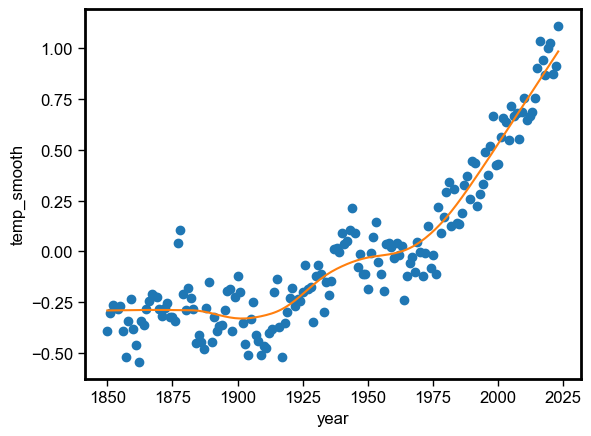

In [17]:
best_gmst.plot(marker='o', lw=0.)
best_smooth_gmst.plot()

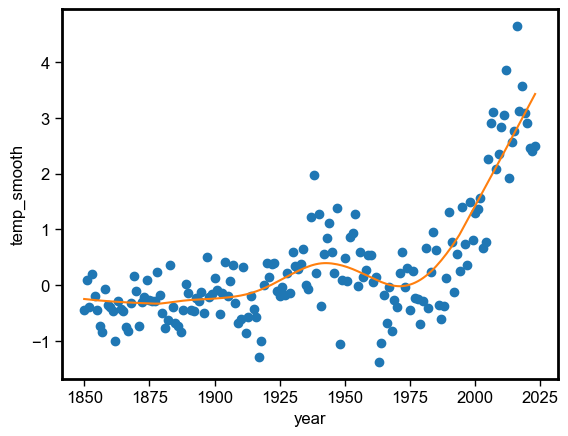

In [18]:
best_arctic.plot(marker='o', lw=0.)
best_smooth_arctic.plot()

In [19]:
from functions.trend_analysis import calc_trend
from functions.accl_analysis import calc_accl1d, calc_pval1d


In [20]:
start_analysis_year = 1850
end_analysis_year  = 2023

In [21]:
res_trend = calc_trend(best_smooth_arctic, start_year=start_analysis_year, end_year=end_analysis_year)
res_trend

(0.0883610595252072, 4.015234549292757e-06, 173)

In [22]:
accl, pval = calc_accl1d(best_smooth_arctic.sel(year = slice(start_analysis_year, end_analysis_year)), duration=32, gap=4), \
    calc_pval1d(best_smooth_arctic.sel(year = slice(start_analysis_year, end_analysis_year)), duration=32, gap=4)
accl, pval

(0.004186932401476474, 8.327394784350735e-05)

In [23]:
# temp_increase = best_smooth_arctic.sel(year=slice(end_analysis_year-5, end_analysis_year)).mean('year') \
#     - best_smooth_arctic.sel(year = slice(start_analysis_year, start_analysis_year+5)).mean('year')
temp_increase = best_smooth_arctic.sel(year=end_analysis_year-1) \
    - best_smooth_arctic.sel(year = start_analysis_year)
decades = ((end_analysis_year - start_analysis_year) + 1)/10
temp_increase_no_accl = decades*res_trend[0]
temp_increase_accl = decades*res_trend[0] + 0.5*accl*(decades**2)

In [24]:
temp_increase, temp_increase_no_accl, temp_increase_accl

(<xarray.DataArray 'temp_smooth' ()>
 array(3.58762025),
 1.5374824357386052,
 2.1713002626741136)

In [25]:
trend=res_trend[0]
accl=accl

xx = np.arange(0, 301, 1)
decades = (xx/10)
# initial_temp = -0.2
anom_no_accl = trend*decades # degC/year
anom_accl = trend*decades + 0.5*accl*(decades**2) # degC/year

(-0.6050117320133503, -1.3084163754613978)

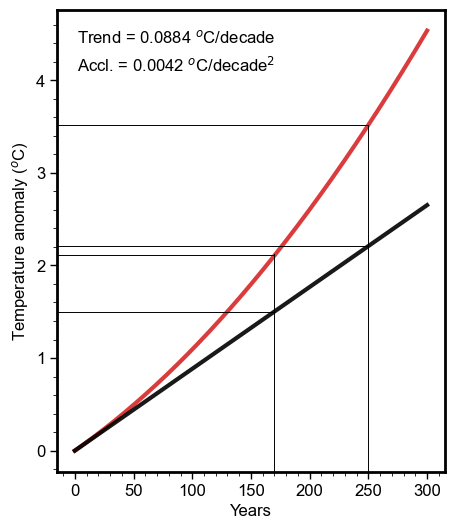

In [544]:
plt.figure(figsize=(5,6))
plt.plot(xx, anom_accl, alpha=0.9, color='tab:red', lw=3.0)
plt.plot(xx, anom_no_accl, alpha=0.9, color='k', lw=3.0)
plt.axvline(170, ymax=0.47, color='k', ls='-', lw=0.7)
plt.axvline(250, ymax=0.75, color='k', ls='-', lw=0.7)
# plt.axvline(250, color='k', ls='--')
plt.axhline(anom_accl[170], xmax=0.56, color='k', ls='-', lw=0.7)
plt.axhline(anom_no_accl[170], xmax=0.56, color='k', ls='-', lw=0.7)
plt.axhline(anom_accl[250], xmax=0.8, color='k', ls='-', lw=0.7)
plt.axhline(anom_no_accl[250], xmax=0.8, color='k', ls='-', lw=0.7)
# plt.axhline(anom_accl[250], color='k', ls='--')
plt.xlabel('Years')
plt.ylabel('Temperature anomaly ($^{o}$C)')
plt.text(1.5, 4.4, f'Trend = {np.round(trend, 4)} $^o$C/decade')
plt.text(1.5, 4.1, f'Accl. = {np.round(accl, 4)} $^o$C/decade$^2$')
plt.minorticks_on()
plt.savefig('./images/misc/accl_meaning_arctic.png', dpi=300, bbox_inches='tight')
anom_no_accl[170] - anom_accl[170], anom_no_accl[250] - anom_accl[250]